In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Charger les données
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Diviser les données en caractéristiques (X) et cible (y)
X = data.drop(columns=["NObeyesdad"])
y = data["NObeyesdad"]

# Encoder les variables catégorielles
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.950354609929078

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.86      0.86        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Charger les données
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Sélectionner uniquement les caractéristiques nécessaires
X = data[["Gender", "Age", "Height", "SMOKE", "family_history_with_overweight", "FAVC", "MTRANS"]]
y = data["NObeyesdad"]

# Encoder les variables catégorielles
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Sauvegarder le modèle et les encodeurs dans des fichiers
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


C:\Users\cheik\AppData\Local\Temp\ipykernel_3224\80172795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\cheik\AppData\Local\Temp\ipykernel_3224\80172795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\cheik\AppData\Local\Temp\ipykernel_3224\80172795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Accuracy: 0.7092198581560284

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.79      0.77        56
      Normal_Weight       0.63      0.50      0.56        62
     Obesity_Type_I       0.76      0.69      0.72        78
    Obesity_Type_II       0.79      0.83      0.81        58
   Obesity_Type_III       0.89      0.94      0.91        63
 Overweight_Level_I       0.56      0.66      0.61        56
Overweight_Level_II       0.53      0.54      0.53        50

           accuracy                           0.71       423
          macro avg       0.70      0.71      0.70       423
       weighted avg       0.71      0.71      0.71       423



['label_encoders.pkl']

In [79]:
import pandas as pd

# Créer un dictionnaire pour les nouvelles données
new_data = {
    "Gender": ["Male"],  # Genre: Male
    "Age": [20],  # Âge: 20 ans
    "Height": [110],  # Taille (en cm): 110 cm
    "SMOKE": ["no"],  # Fumeur: Non
    "family_history_with_overweight": ["yes"],  # Antécédent familial d'obésité: Oui
    "FAVC": ["yes"],  # Fréquence de consommation de nourriture hypercalorique: Oui
    "MTRANS": ["Public_Transportation"]  # Mode de transport: Public_Transportation
}

# Créer un DataFrame à partir des nouvelles données
new_data_df = pd.DataFrame(new_data)

# Encoder les variables catégorielles
for column in new_data_df.select_dtypes(include=['object']).columns:
    new_data_df[column] = label_encoders[column].transform(new_data_df[column])

# Faire la prédiction
prediction = random_forest.predict(new_data_df)

print("Prédiction de l'obésité pour un homme de 20 ans, non-fumeur, une taille de 110 cm, un antécédent familial d'obésité, consommation fréquente de nourriture hypercalorique, et utilisant les transports publics:")
print("Niveau d'obésité prédit:", prediction[0])



Prédiction de l'obésité pour un homme de 20 ans, non-fumeur, une taille de 110 cm, un antécédent familial d'obésité, consommation fréquente de nourriture hypercalorique, et utilisant les transports publics:
Niveau d'obésité prédit: Obesity_Type_I


In [75]:
import joblib

# Sauvegarder le modèle dans un fichier
joblib.dump(random_forest, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [73]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur la grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Faire des prédictions avec le meilleur modèle
best_predictions = best_model.predict(X_test)

# Évaluer les performances du meilleur modèle
print("Accuracy (meilleur modèle):", accuracy_score(y_test, best_predictions))
print("\nClassification Report (meilleur modèle):")
print(classification_report(y_test, best_predictions))


Meilleurs hyperparamètres: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy (meilleur modèle): 0.7044917257683215

Classification Report (meilleur modèle):
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.73      0.74        56
      Normal_Weight       0.60      0.60      0.60        62
     Obesity_Type_I       0.77      0.69      0.73        78
    Obesity_Type_II       0.70      0.76      0.73        58
   Obesity_Type_III       0.88      0.95      0.92        63
 Overweight_Level_I       0.62      0.66      0.64        56
Overweight_Level_II       0.56      0.50      0.53        50

           accuracy                           0.70       423
          macro avg       0.70      0.70      0.70       423
       weighted avg       0.70      0.70      0.70       423



In [74]:
from sklearn.ensemble import RandomForestClassifier

# Définir les valeurs des hyperparamètres
n_estimators = 100  # Le nombre d'arbres dans la forêt
max_depth = 20  # La profondeur maximale de chaque arbre
min_samples_split = 5  # Le nombre minimum d'échantillons requis pour diviser un nœud

# Initialiser le modèle avec les hyperparamètres spécifiés
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)


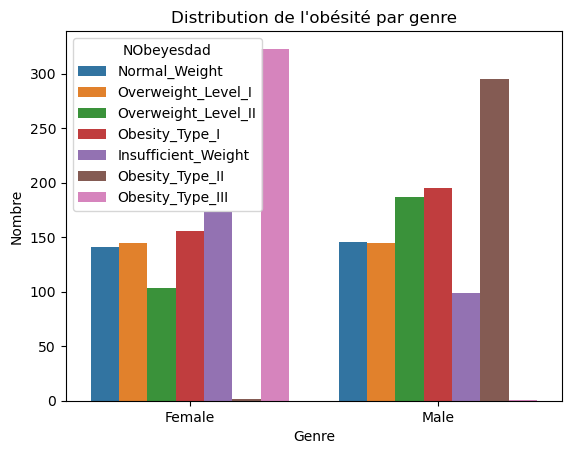

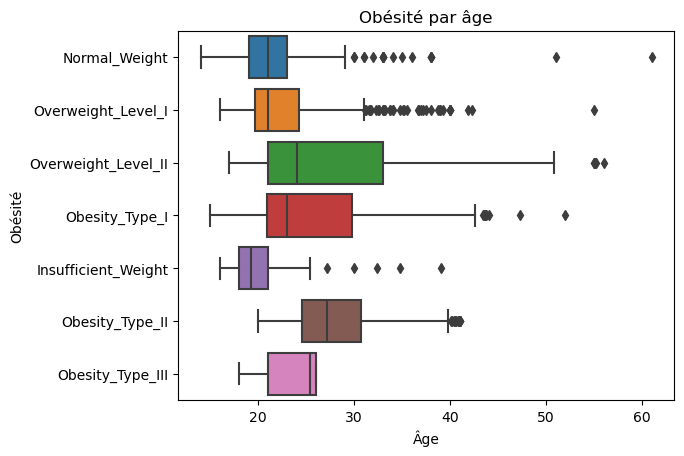

ValueError: Could not interpret value `Smoke` for parameter `hue`

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique de barres pour l'obésité en fonction du genre
sns.countplot(x='Gender', hue='NObeyesdad', data=data)
plt.title('Distribution de l\'obésité par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()

# Diagramme en boîte pour l'obésité en fonction de l'âge
sns.boxplot(x='Age', y='NObeyesdad', data=data)
plt.title('Obésité par âge')
plt.xlabel('Âge')
plt.ylabel('Obésité')
plt.show()

# Nuage de points pour la taille et l'obésité
sns.scatterplot(x='Height', y='NObeyesdad', hue='Smoke', data=data)
plt.title('Relation entre la taille, l\'obésité et le fait de fumer')
plt.xlabel('Taille')
plt.ylabel('Obésité')
plt.show()

# Graphique de barres pour le fait de fumer (FAVC) en fonction de l'âge
sns.countplot(x='Age', hue='FAVC', data=data)
plt.title('Distribution du fait de fumer par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.show()


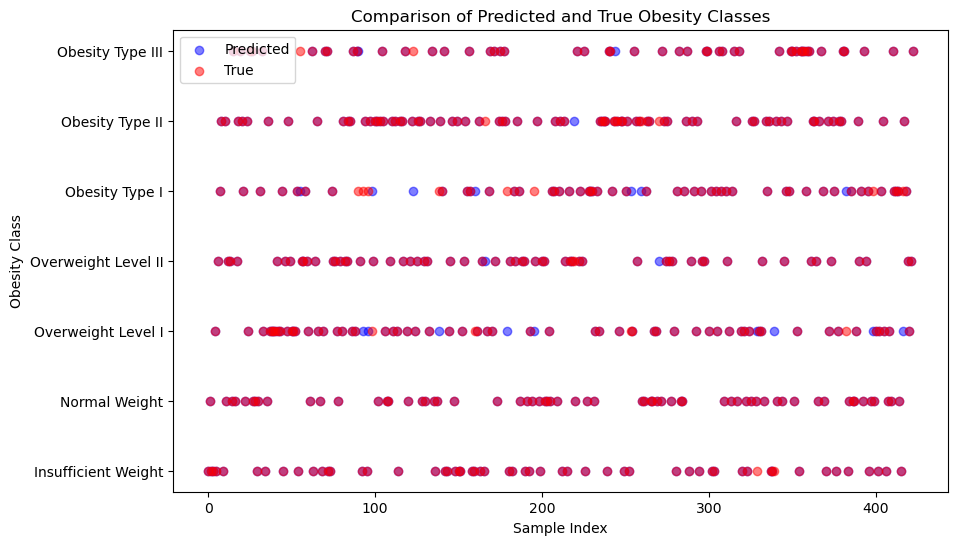

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un dictionnaire pour mapper les classes prédites et les classes réelles
class_mapping = {0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Overweight Level I', 
                 3: 'Overweight Level II', 4: 'Obesity Type I', 5: 'Obesity Type II', 
                 6: 'Obesity Type III'}

# Créer une figure
plt.figure(figsize=(10, 6))

# Plot des classes prédites
plt.scatter(np.arange(len(y_test)), predictions, color='blue', alpha=0.5, label='Predicted')

# Plot des vraies classes
plt.scatter(np.arange(len(y_test)), y_test, color='red', alpha=0.5, label='True')

# Ajouter des étiquettes d'axe et une légende
plt.xlabel('Sample Index')
plt.ylabel('Obesity Class')
plt.title('Comparison of Predicted and True Obesity Classes')
plt.legend(loc='upper left')

# Définir les étiquettes de classe sur l'axe y
plt.yticks(np.arange(7), [class_mapping[i] for i in range(7)])

# Afficher le graphique
plt.show()


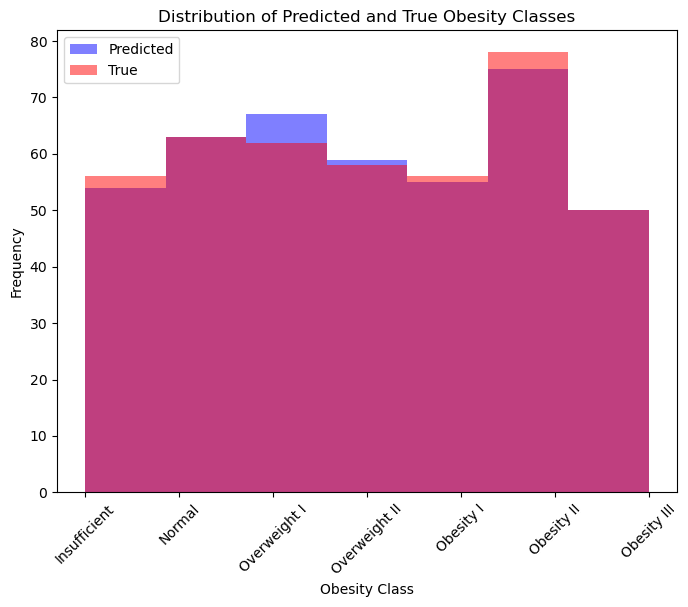

In [4]:
import matplotlib.pyplot as plt

# Créer une figure
plt.figure(figsize=(8, 6))

# Plot des classes prédites
plt.hist(predictions, bins=7, color='blue', alpha=0.5, label='Predicted')

# Plot des vraies classes
plt.hist(y_test, bins=7, color='red', alpha=0.5, label='True')

# Ajouter des étiquettes d'axe et une légende
plt.xlabel('Obesity Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted and True Obesity Classes')
plt.xticks(range(7), ['Insufficient', 'Normal', 'Overweight I', 'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'], rotation=45)
plt.legend()

# Afficher le graphique
plt.show()


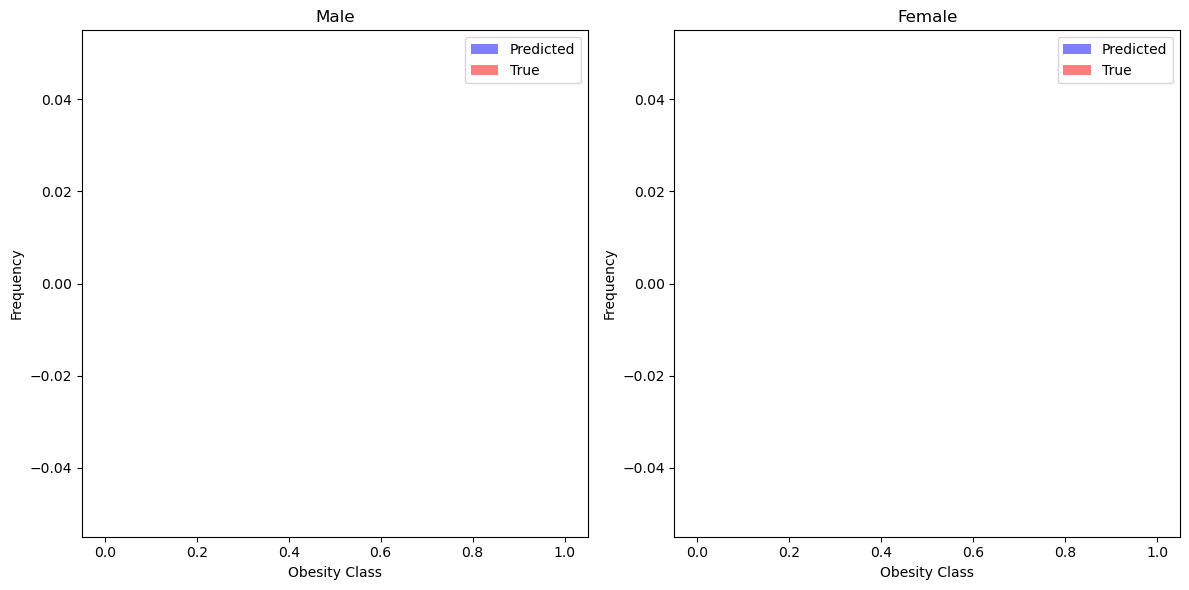

In [6]:
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique pour les hommes
axes[0].hist(predictions[X_test['Gender'] == 'Male'], bins=7, color='blue', alpha=0.5, label='Predicted')
axes[0].hist(y_test[X_test['Gender'] == 'Male'], bins=7, color='red', alpha=0.5, label='True')
axes[0].set_title('Male')
axes[0].set_xlabel('Obesity Class')
axes[0].set_ylabel('Frequency')

# Graphique pour les femmes
axes[1].hist(predictions[X_test['Gender'] == 'Female'], bins=7, color='blue', alpha=0.5, label='Predicted')
axes[1].hist(y_test[X_test['Gender'] == 'Female'], bins=7, color='red', alpha=0.5, label='True')
axes[1].set_title('Female')
axes[1].set_xlabel('Obesity Class')
axes[1].set_ylabel('Frequency')

# Ajouter une légende
axes[0].legend()
axes[1].legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


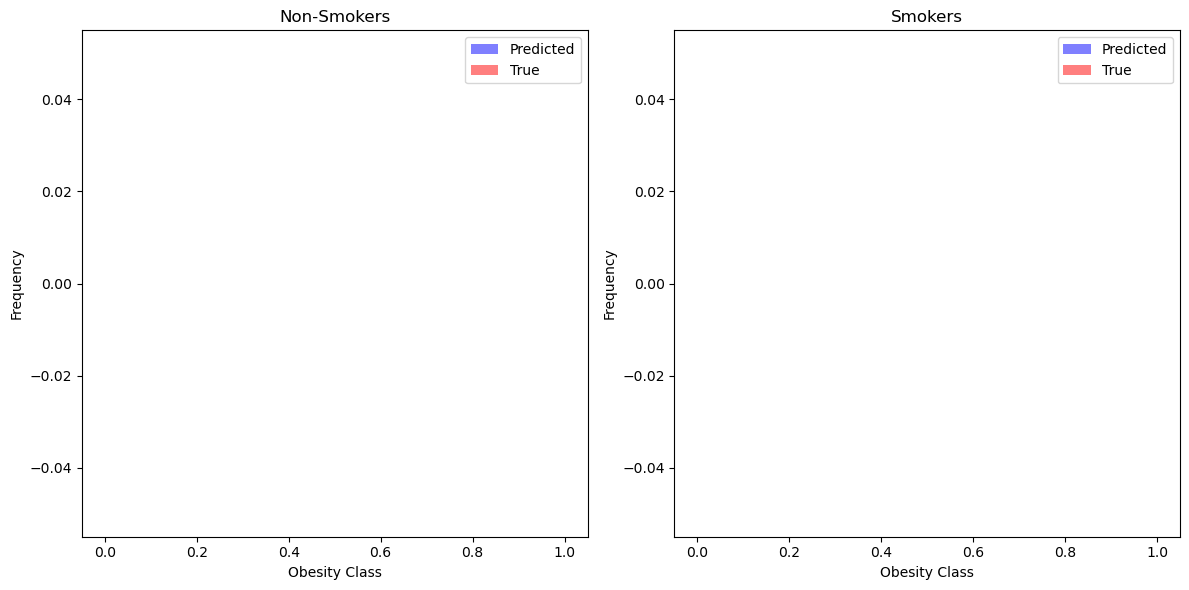

In [7]:
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique pour les non-fumeurs
axes[0].hist(predictions[y_test == 'Non Obese'], bins=7, color='blue', alpha=0.5, label='Predicted')
axes[0].hist(y_test[y_test == 'Non Obese'], bins=7, color='red', alpha=0.5, label='True')
axes[0].set_title('Non-Smokers')
axes[0].set_xlabel('Obesity Class')
axes[0].set_ylabel('Frequency')

# Graphique pour les fumeurs
axes[1].hist(predictions[y_test == 'Obese'], bins=7, color='blue', alpha=0.5, label='Predicted')
axes[1].hist(y_test[y_test == 'Obese'], bins=7, color='red', alpha=0.5, label='True')
axes[1].set_title('Smokers')
axes[1].set_xlabel('Obesity Class')
axes[1].set_ylabel('Frequency')

# Ajouter une légende
axes[0].legend()
axes[1].legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Charger les données
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Diviser les données en caractéristiques (X) et cible (y)
X = data.drop(columns=["NObeyesdad"])
y = data["NObeyesdad"]

# Encoder les variables catégorielles
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.950354609929078

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.86      0.86        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Charger les données
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Encoder les variables catégorielles
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Filtrer les fumeurs
smokers_data = data[data['SMOKE'] == 1].copy()

# Supprimer la colonne de la cible (NObeyesdad) de l'ensemble de données des fumeurs
smokers_data.drop(columns=["NObeyesdad"], inplace=True)

# Prédire les niveaux d'obésité pour les fumeurs
predictions_smokers = random_forest.predict(smokers_data)

# Décoder les prédictions en labels
predictions_labels = label_encoders["NObeyesdad"].inverse_transform(predictions_smokers)

# Afficher les prédictions pour les fumeurs
print("Prédictions pour les fumeurs :")
print(predictions_labels)


ValueError: y contains previously unseen labels: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


label_encoder = LabelEncoder()
for column in ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']:
    df[column] = label_encoder.fit_transform(df[column])

Split the data into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Initialize and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose an appropriate value for n_neighbors
knn.fit(X_train, y_train)

Make predictions on the test set
y_pred = knn.predict(X_test)

Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Print the classification report
print(classification_report(y_test, y_pred))

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Chargement des données à partir du fichier CSV (assurez-vous d'adapter le chemin selon votre cas)
data = pd.read_csv('titanic_data.csv')
data.head()
# Séparation de la variable cible (Survived) des caractéristiques
X = data.drop('Survived', axis=1)
y = data['Survived']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size indique la proportion des données à inclure dans l'ensemble de test (ici, 20%)
# random_state permet de garantir la reproductibilité des résultats

# Affichage des dimensions des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)